In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten,Dropout

In [10]:
from tensorflow.keras.preprocessing .image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 ,shear_range = 0.1,zoom_range = 0.1)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
x_train = train_datagen.flow_from_directory(r'C:\Users\surya\Desktop\Snake\Images1\Train',target_size = (256,256),batch_size = 20,class_mode = "categorical")
x_test = test_datagen.flow_from_directory(r'C:\Users\surya\Desktop\Snake\Images1\Test',target_size = (256,256),batch_size = 20,class_mode = "categorical")

Found 367 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [73]:
x_train

In [74]:
x_train.class_indices

{'Down': 0, 'Left': 1, 'Right': 2, 'Up': 3}

In [75]:
x_test.class_indices

{'Down': 0, 'Left': 1, 'Right': 2, 'Up': 3}

In [76]:
len(x_test)

2

In [77]:
len(x_train)

19

In [78]:
x_train


In [79]:
model = Sequential()

In [80]:
model.add(Convolution2D(32,(3,3),input_shape = (256,256,3)))

In [81]:
model.add(MaxPooling2D((3,3)))

In [82]:
model.add(Dropout(0.2))

In [83]:
model.add(Flatten())

In [84]:
model.add(Dense(units = 256, kernel_initializer= "random_uniform",activation = "relu"))

In [85]:
model.add(Dropout(0.25))

In [86]:
model.add(Dense(units = 256, kernel_initializer= "random_uniform",activation = "relu"))

In [87]:
model.add(Dropout(0.1))

In [88]:
model.add(Dense(units = 4 , kernel_initializer= "random_uniform",activation = "sigmoid"))

In [89]:
model.compile(optimizer= "adam",loss = "categorical_crossentropy" , metrics =["accuracy"])

In [90]:
model.fit(x_train,steps_per_epoch =8 , epochs = 30 , validation_data = x_test,validation_steps = 3 )

Epoch 1/30
8/8 [==============================] - 15s 2s/step - loss: 5.1310 - accuracy: 0.3000 - val_loss: 1.9122 - val_accuracy: 0.2500
Epoch 2/30
8/8 [==============================] - 9s 1s/step - loss: 1.1791 - accuracy: 0.5714
Epoch 3/30
8/8 [==============================] - 7s 883ms/step - loss: 0.5513 - accuracy: 0.7891
Epoch 4/30
8/8 [==============================] - 7s 951ms/step - loss: 0.4810 - accuracy: 0.7619
Epoch 5/30
8/8 [==============================] - 9s 1s/step - loss: 0.4037 - accuracy: 0.8125
Epoch 6/30
8/8 [==============================] - 8s 959ms/step - loss: 0.3498 - accuracy: 0.8125
Epoch 7/30
8/8 [==============================] - 8s 906ms/step - loss: 0.2510 - accuracy: 0.8844
Epoch 8/30
8/8 [==============================] - 8s 974ms/step - loss: 0.1664 - accuracy: 0.9312
Epoch 9/30
8/8 [==============================] - 8s 989ms/step - loss: 0.1561 - accuracy: 0.9375
Epoch 10/30
8/8 [==============================] - 8s 994ms/step - loss: 0.1513 - ac

In [91]:
model.save("Hand_Rec.h5")

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 84, 84, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 225792)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               57803008  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

###  Testing

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np

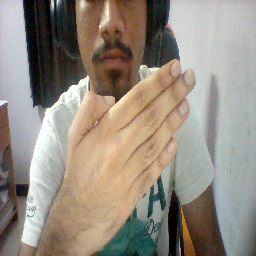

In [2]:
img = image.load_img(r"C:\Users\surya\Desktop\Snake\Images1\Test\Left\Left 92.jpg",target_size = (256,256))
img

In [3]:
x = image.img_to_array(img)

In [4]:
x.shape

(256, 256, 3)

In [5]:
x = np.expand_dims(x,axis = 0)

In [6]:
x.shape

(1, 256, 256, 3)

In [103]:
pred = model.predict(x)

In [104]:
pred

array([[0., 1., 0., 0.]], dtype=float32)

In [44]:
pred>0.5

array([[False,  True,  True, False]])